DATA PREPROCESSING

FIRST WE ARE DOING PREPROCESSING FOR THE TRAIN DATASET

In [1]:
import pandas as pd

df=pd.read_csv("E:/projects/microsoft cyber security/GUIDE_Train.csv")
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [2]:
no_of_samples=500000
def samples_per_group(group):
    if len(group)>=no_of_samples:
        return group.sample(n=no_of_samples,random_state=42)
    else:
        return group
sampled_df = df.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)    

C:\Users\nambi\AppData\Local\Temp\ipykernel_4724\504794154.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)


In [3]:
sampled_df.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath

In [4]:
sampled_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    500000
FalsePositive     500000
TruePositive      500000
Name: count, dtype: int64

FINDING NULL VALUES AND REMOVE THAT FROM THE COLUMNS 

In [5]:
nullvalues = sampled_df.isnull().sum()
nullvalues

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        838277
IncidentGrade               0
ActionGrouped         1499143
ActionGranular        1499143
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1485147
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1489043
FileName                    0
FolderPath

From the above code, we clearly seen that the null values presented columns are MitreTechniques,ActionGrouped,ActionGranular,EmailClusterId,ThreatFamily,ResourceType,Roles,AntispamDirection,SuspicionLevel,LastVerdict. Every column has more than 40% null values, so i decided to drop the columns due to that.

In [6]:
sampled_df.drop(columns=['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'],inplace=True)

In [7]:
sampled_df.shape

(1500000, 35)

In [8]:
sampled_df.duplicated().sum()

np.int64(15984)

In [9]:
sampled_df.drop_duplicates(inplace=True)

In [10]:
sampled_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

Now every columns in the dataset consist of no null values . Lets move onto the next thing .

In [11]:
sampled_df.dtypes

Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
Timestamp             object
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId               int64
Sha256                 int64
IpAddress              int64
Url                    int64
AccountSid             int64
AccountUpn             int64
AccountObjectId        int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueName      int64
RegistryValueData      int64
ApplicationId          int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
FolderPath             int64
ResourceIdName         int64
OSFamily               int64
OSVersion              int64
CountryCode            int64
State                  int64
City          

In [12]:
# now we are taking four columns from the Timestamp column , so we are going to drop the timestamp column, because it is not needed for us .
sampled_df.drop(columns=['Timestamp'],inplace=True)

In [15]:
sampled_df.to_csv("traincleaned.csv")

EDA(EXPLORATORY DATA ANALYSIS)

**BIVARIATE ANALYSIS**

In [16]:
sampled_df.nunique()

Id                    395275
OrgId                   4813
IncidentId            292222
AlertId               690830
DetectorId              5834
AlertTitle             52402
Category                  20
IncidentGrade              3
EntityType                31
EvidenceRole               2
DeviceId               26274
Sha256                 33015
IpAddress             100699
Url                    35567
AccountSid            141643
AccountUpn            209550
AccountObjectId       138083
AccountName           144978
DeviceName             38634
NetworkMessageId      111929
RegistryKey              531
RegistryValueName        246
RegistryValueData        271
ApplicationId            447
ApplicationName          731
OAuthApplicationId       197
FileName               56397
FolderPath             25250
ResourceIdName           512
OSFamily                   4
OSVersion                 36
CountryCode              186
State                    956
City                    4587
Year          

Since all the columns are object, we are going to use the visualization for categorical vs categorical variables, we are going to use stacked bar plot, grouped bar plot, mosaicplot and facetgrid.

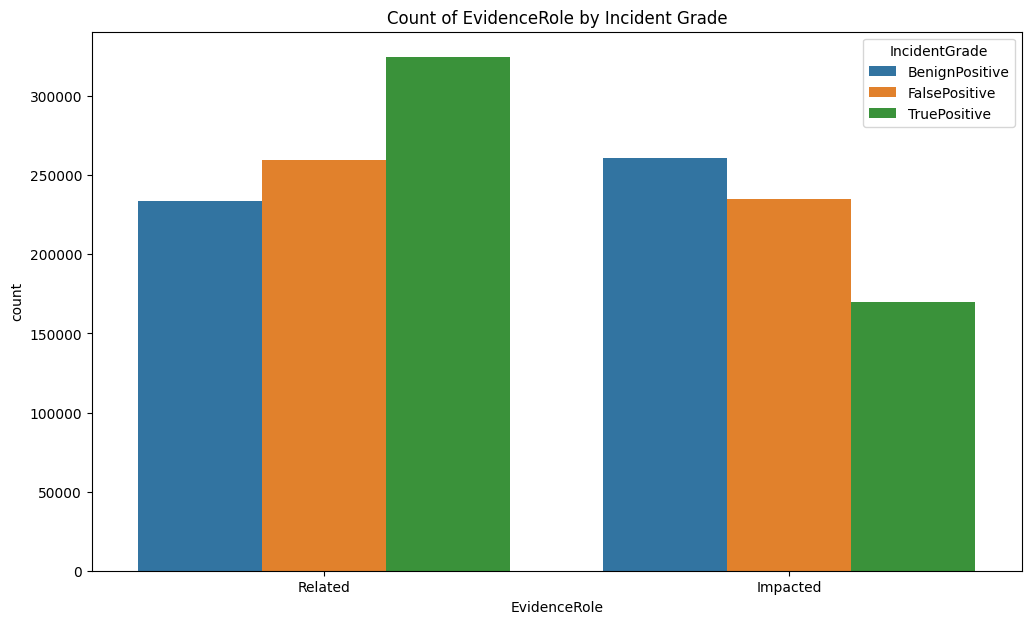

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(sampled_df,x='EvidenceRole',hue='IncidentGrade')
plt.title("Count of EvidenceRole by Incident Grade")
plt.xlabel("EvidenceRole")
plt.ylabel("count")
plt.legend(title=('IncidentGrade'))
plt.show()

**OBSERVATIONS**
* The Evidencetype **Related** received a higher cyber security threat when compare to related.


In [25]:
city_counts = sampled_df['City'].value_counts()
top10cities = city_counts.head(10)
top10cities

City
10630    1379596
0          15676
1           3424
3           3161
2           3062
5           2313
4           2223
13          2090
6           1910
14          1797
Name: count, dtype: int64

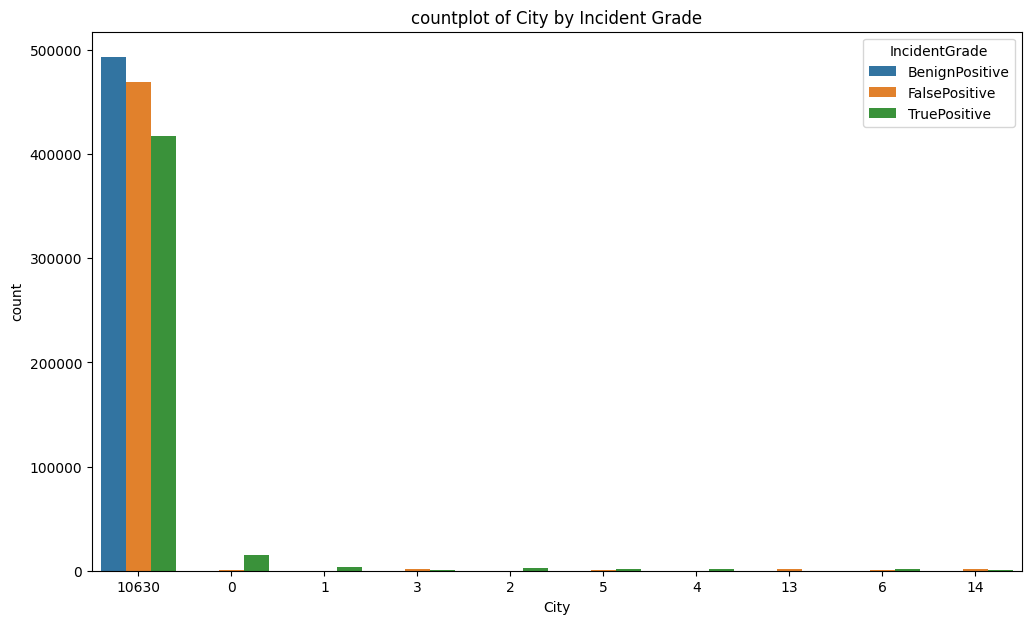

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(sampled_df,x='City',hue='IncidentGrade',order=top10cities.index)
plt.title("countplot of City by Incident Grade")
plt.xlabel("City")
plt.ylabel("count")
plt.legend(title=('IncidentGrade'))
plt.show()

**OBSERVATIONS**
* The City **10630** has a high cyber security threat, compared to other categories.
* It consist of more than 4,00,000 datas of true positive threats, which are highly risky.
* Hence concentrate on the city named **10630**

In [32]:
state_counts = sampled_df['State'].value_counts()
top10_state = state_counts.head(10)

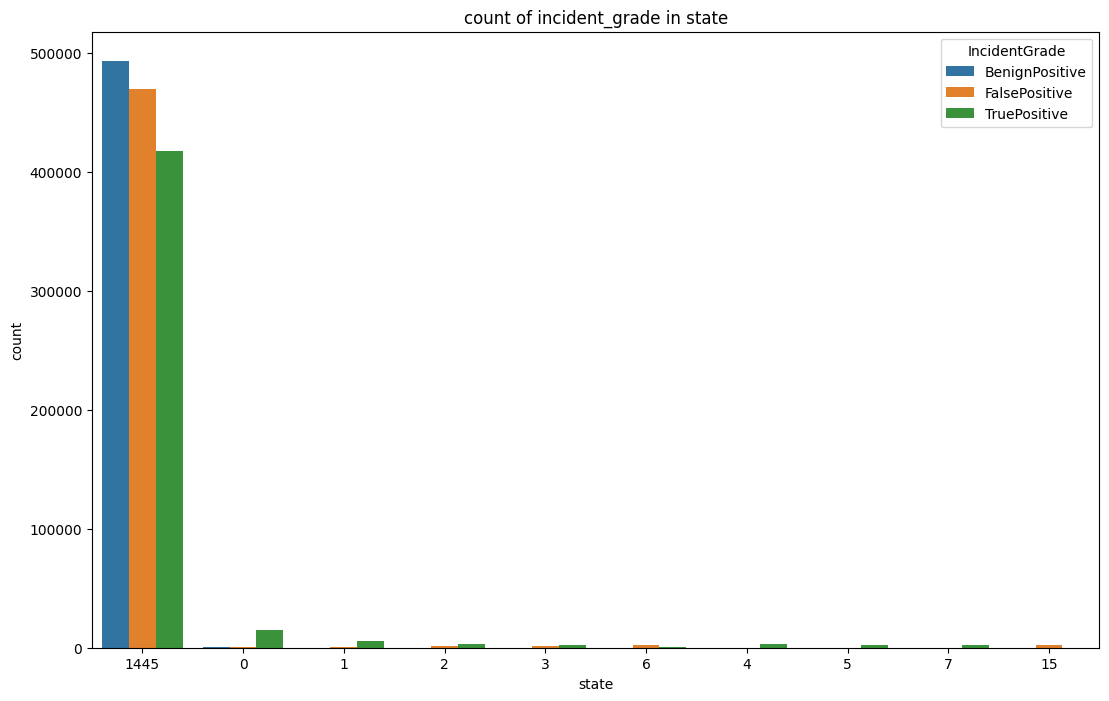

In [33]:
plt.figure(figsize=(13,8))
sns.countplot(sampled_df,x='State',hue='IncidentGrade',order=top10_state.index)
plt.title("count of incident_grade in state")
plt.xlabel("state")
plt.ylabel("count")
plt.legend(title=("IncidentGrade"))
plt.show()

**OBSERVATIONS**
 * THE STATE **1445** CONSIST OF HIGH NUMBER OF TRUE POSITIVE COMPARED TO ALL OTHER STATE WHICH ARE PRESENT IN THE TOP10.
 * IT CONSIST OF MORE THAN 4,00,000 TRUE POSITIVES WHICH IS MORE THREATENING THAN ANY OTHER STATES IN THE DATASET.

In [34]:
entity_count = sampled_df['EntityType'].value_counts()
top10entity = entity_count.head(10)

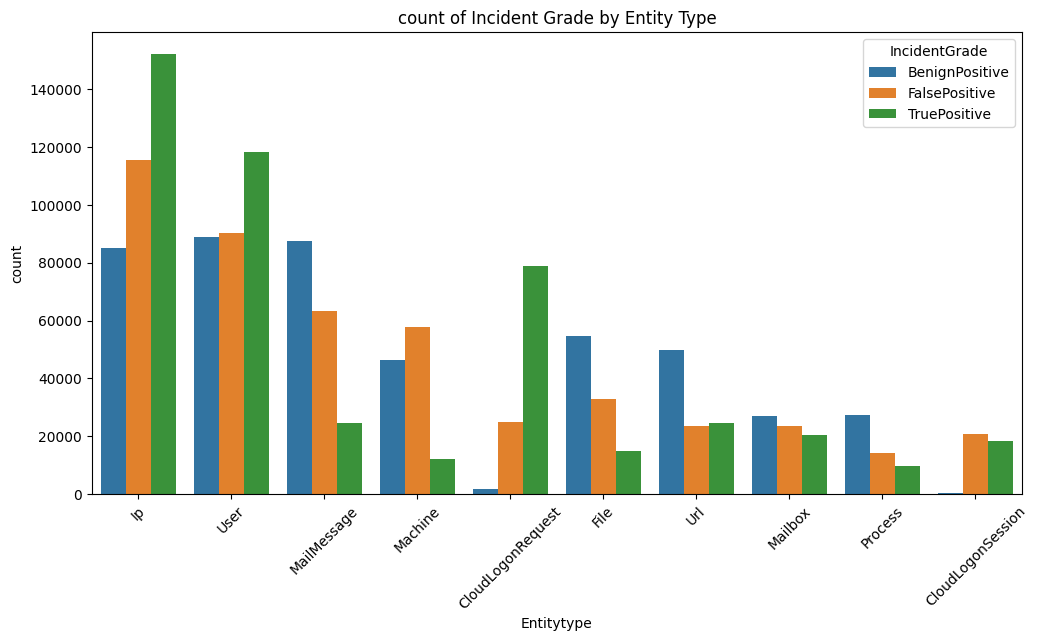

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(sampled_df,x='EntityType',hue='IncidentGrade',order=top10entity.index)
plt.title("count of Incident Grade by Entity Type")
plt.xlabel("Entitytype")
plt.ylabel("count")
plt.legend(title=("IncidentGrade"))
plt.xticks(rotation=45)
plt.show()

**OBSERVATIONS**
* The entity type **IP(INTERNT PROTOCOL)** contains a very large amount of true positive rates more than 1,40,000 threats comes under true positive.
* After that the entity type **user** contains around 1,20,000 true positive rates noted in the dataset. 

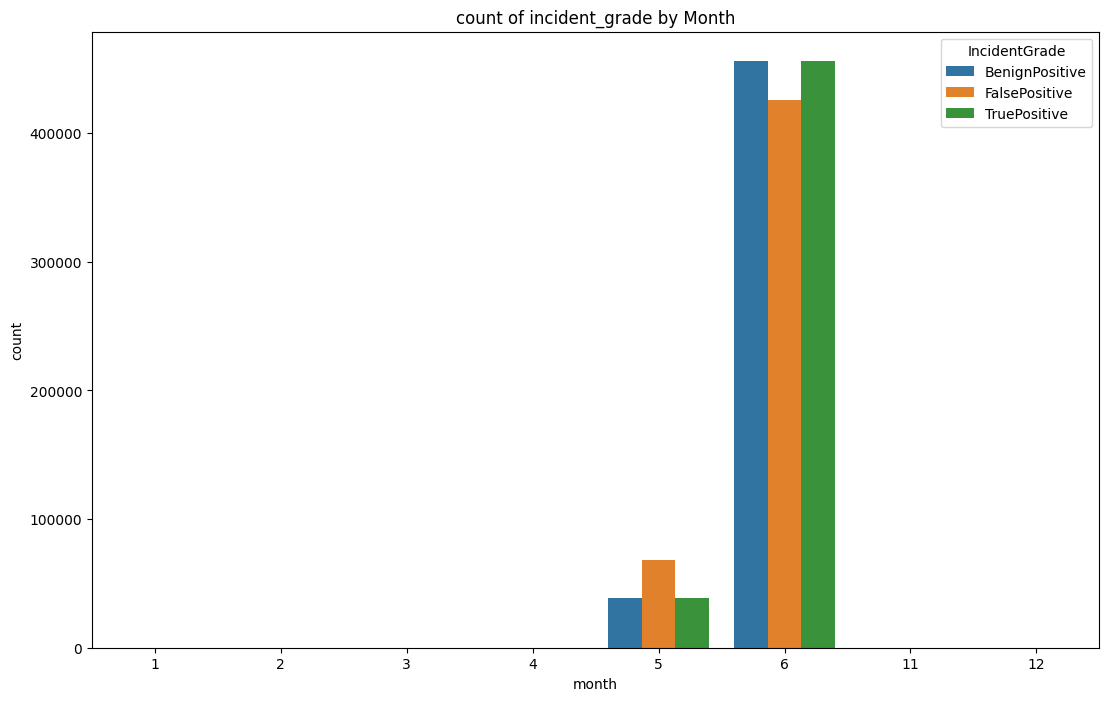

In [37]:
plt.figure(figsize=(13,8))
sns.countplot(sampled_df,x='Month',hue='IncidentGrade')
plt.title("count of incident_grade by Month")
plt.xlabel("month")
plt.ylabel("count")
plt.legend(title=("IncidentGrade"))
plt.show()

**OBSERVATIONS**
* IN THE JUNE MONTH HAS THE RECORD BREAKING THREAT OF OVER 4,00,000 THREATS COMPARED TO OTHER MONTHS.

**PREPROCESSING OF TEST DATASET**

In [1]:
import pandas as pd  
ds = pd.read_csv("E:/projects/microsoft cyber security/GUIDE_Test.csv")
ds.head()

C:\Users\nambi\AppData\Local\Temp\ipykernel_25132\2596182984.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv("E:/projects/microsoft cyber security/GUIDE_Test.csv")


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [2]:
no_of_samples=500000
def samples_per_group(group):
    if len(group)>=no_of_samples:
        return group.sample(n=no_of_samples,random_state=42)
    else:
        return group
sampled_test = ds.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)    

C:\Users\nambi\AppData\Local\Temp\ipykernel_25132\3211408956.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_test = ds.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)


In [4]:
sampled_test.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        811299
IncidentGrade               0
ActionGrouped         1499227
ActionGranular        1499227
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1485275
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1489912
FileName                    0
FolderPath

In [5]:
# now we are taking four columns from the Timestamp column , so we are going to drop the timestamp column, because it is not needed for us .
sampled_test.drop(columns=['Timestamp'],inplace=True)

In [6]:
sampled_test.drop(columns=['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'],inplace=True)

In [11]:
sampled_test.shape

(1500000, 34)

In [ ]:
sampled_test.drop(columns='Usage',inplace=True)

In [ ]:
sampled_test.to_csv("testprocessed.csv")